In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('F:\Machine Learning\CSV file\Mall_Customers_Enhanced.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\HP\AppData\Local\Temp\ipykernel_12732\2960821947.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('F:\Machine Learning\CSV file\Mall_Customers_Enhanced.csv')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label = LabelEncoder()
df.Gender = label.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,1,19,15,39,18-25,11.10,456,3,Budget
1,2,1,21,15,81,18-25,6.90,300,6,Luxury
2,3,0,20,16,6,18-25,15.36,594,2,Budget
3,4,0,23,16,77,18-25,7.79,300,6,Luxury
4,5,0,31,17,40,26-35,12.47,480,5,Budget


In [6]:
df['Preferred Category'] = label.fit_transform(df['Preferred Category'])
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,1,19,15,39,18-25,11.10,456,3,0
1,2,1,21,15,81,18-25,6.90,300,6,3
2,3,0,20,16,6,18-25,15.36,594,2,0


In [7]:
df = df.drop(['CustomerID'],axis='columns')
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,19,15,39,18-25,11.10,456,3,0
1,1,21,15,81,18-25,6.90,300,6,3
2,0,20,16,6,18-25,15.36,594,2,0


In [8]:
df.dropna(subset=['Age Group'],inplace=True)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,19,15,39,18-25,11.10,456,3,0
1,1,21,15,81,18-25,6.90,300,6,3
2,0,20,16,6,18-25,15.36,594,2,0


In [9]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)','Estimated Savings (k$)']]

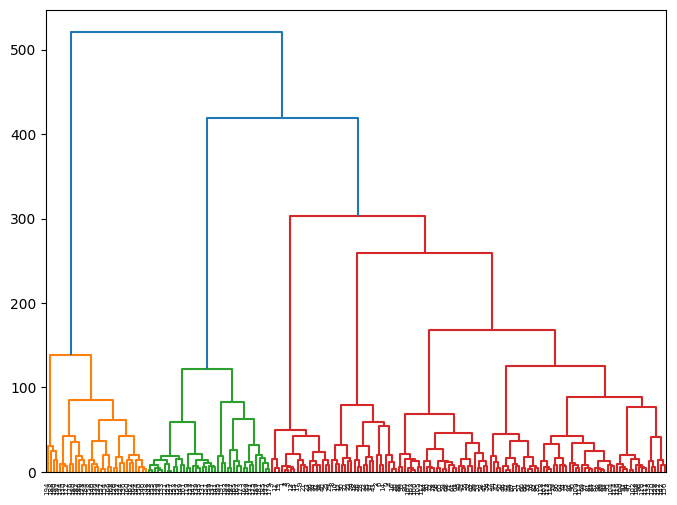

In [11]:
plt.figure(figsize=(8,6))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

In [15]:
hc = AgglomerativeClustering(n_clusters=3,linkage='ward')
y_hc = hc.fit_predict(X)
df['cluster']= y_hc

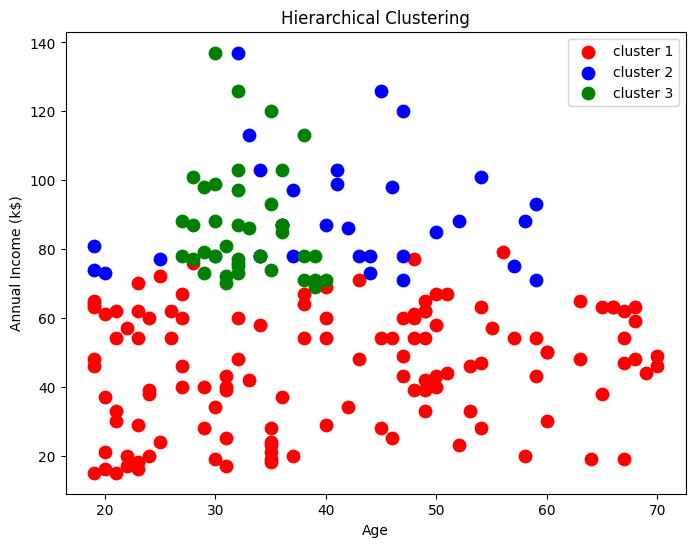

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(df[df['cluster']==0]['Age'], df[df['cluster']==0]['Annual Income (k$)'], 
            s=80, color='red', label='cluster 1')

plt.scatter(df[df['cluster']==1]['Age'], df[df['cluster']==1]['Annual Income (k$)'], 
            s=80, color='blue', label='cluster 2')

plt.scatter(df[df['cluster']==2]['Age'], df[df['cluster']==2]['Annual Income (k$)'], 
            s=80, color='green', label='cluster 3')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()


In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=18) 
le = MinMaxScaler() 
X_sca = le.fit_transform(X)
y_db = db.fit_predict(X_sca)
df['DBSCAN_Cluster'] = y_db

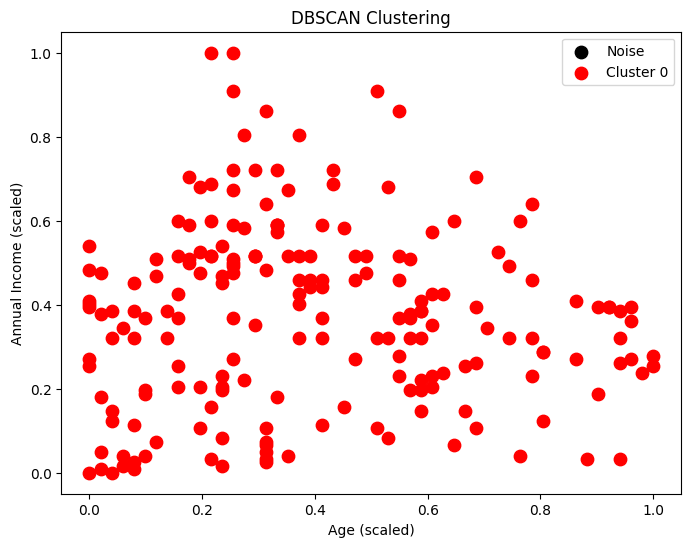

In [27]:
plt.figure(figsize=(8,6))

# Noise points
plt.scatter(X_sca[y_db==-1,0], X_sca[y_db==-1,1], s=80, color='black', label='Noise')

# Cluster points
unique_labels = set(y_db)
colors = ['red','blue','green','cyan','magenta']

for k, col in zip(unique_labels, colors):
    if k == -1:  # noise already plotted
        continue
    plt.scatter(X_sca[y_db==k,0], X_sca[y_db==k,1], s=80, color=col, label=f'Cluster {k}')

plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()
